# Data Preprocessing in Machine Learning: A Key to Effective Model Training

## Abstract
- This Jupyter Notebook demonstrates the significance of data preprocessing in improving machine learning model performance.
- The focus is on handling missing values, scaling, encoding categorical data, and removing outliers.
- Using a healthcare dataset, various preprocessing techniques are applied and their impact on model accuracy is evaluated.
- The results highlight the importance of data preprocessing in achieving reliable and efficient machine learning models.


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset from a GitHub repository (replace with your dataset link if hosted on GitHub)
url = 'https://raw.githubusercontent.com/RitwikGiri98/DataScience/refs/heads/main/healthcare_dataset.csv'
df = pd.read_csv(url)

# Display the first few rows to understand the dataset's structure
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Theory and Background
- **Data Preprocessing**: A crucial step to transform raw data into a clean format, ready for analysis and model training.
- **Why Preprocessing?**: Ensures the data quality, leading to accurate predictions and faster model training.
- **Key Techniques**:
  - Data Cleaning: Address missing values and inconsistencies.
  - Data Normalization: Align feature scales for better model convergence.
  - Categorical Encoding: Convert categorical variables into a numerical format.
  - Outlier Detection: Identify and mitigate outliers for robust model training.


## Problem Statement
- **Objective**: Explore the impact of preprocessing on machine learning model performance using the healthcare dataset.
- **Challenges**:
  - Dataset contains missing values, outliers, and categorical variables.
  - Features have different scales that can affect model performance.
- **Goal**: Preprocess the dataset and compare the accuracy of models trained with raw and preprocessed data.


## Data Preprocessing

### 1. Data Cleaning
- **Handling Missing Values**:
  - Impute numerical features using mean values.
  - Impute categorical features using the mode.


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)




Missing values in each column:
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Since there are no missing values in your dataset, we can streamline the preprocessing steps by removing the missing value handling part. Additionally, defining numerical and categorical columns at the beginning is a good practice as it helps in organizing the preprocessing steps more effectively.

In [ ]:
numerical_cols = ['Age', 'Billing Amount']
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor',
                       'Hospital', 'Insurance Provider', 'Admission Type',
                       'Medication', 'Test Results']

### 2. Data Normalization/Scaling
- **Why Scale Data?**: Ensures that features contribute equally during model training.
- **Method**: Standardize numerical features using `StandardScaler`.


In [ ]:
# Calculate skewness for numerical columns
skewness = df[numerical_cols].skew()
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 Age              -0.005735
Billing Amount   -0.000978
dtype: float64


Since the skewness of both Age and Billing Amount is close to zero, **StandardScaler** is generally the better choice here. It will standardize the features such that they have a mean of 0 and a standard deviation of 1,

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled features
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,-1.098824,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,-0.470261,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,0.533639,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,0.570250,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,1.247842,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,0.169990,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,-1.200853,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,0.870465,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,-0.435636,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,-0.795211,458,Urgent,2022-10-09,Penicillin,Abnormal


It standardizes the features such that they have a mean of 0 and a standard deviation of 1, which can be beneficial for algorithms that assume normally distributed data, like linear regression, logistic regression, and many others.

### 3. Encoding Categorical Variables
- **Why Encode?**: Converts categorical data into numerical values that can be used by machine learning models.
- **Method**: One-Hot Encoding for categorical features.


In [ ]:
# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame
df_encoded.head()

,Name,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,Bobby JacksOn,-1.098824,2024-01-31,-0.470261,328,2024-02-02,True,False,False,False,...,False,False,False,True,False,False,True,False,False,True
1,LesLie TErRy,0.533639,2019-08-20,0.570250,265,2019-08-26,True,False,False,False,...,True,False,True,False,True,False,False,False,True,False
2,DaNnY sMitH,1.247842,2022-09-22,0.169990,205,2022-10-07,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
3,andrEw waTtS,-1.200853,2020-11-18,0.870465,450,2020-12-18,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,adrIENNE bEll,-0.435636,2022-09-19,-0.795211,458,2022-10-09,False,False,True,False,...,False,False,False,True,False,False,False,True,False,False


### 4. Outlier Handling
- **Why Handle Outliers?**: Prevents them from skewing model results and improves robustness.
- **Method**: Using Interquartile Range (IQR) to identify and adjust outliers in numerical features.


In [ ]:
# Function to identify and adjust outliers based on IQR
def adjust_outliers_iqr(data, feature):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Adjusting outliers
    # Replace outliers with the lower or upper bound
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

for col in numerical_cols:
    adjust_outliers_iqr(df, col)

# Display the first few rows of the adjusted DataFrame
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,-1.098824,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,-0.470261,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,0.533639,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,0.570250,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,1.247842,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,0.169990,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,-1.200853,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,0.870465,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,-0.435636,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,-0.795211,458,Urgent,2022-10-09,Penicillin,Abnormal


### 5. Feature Selection
- **Why Select Features?**: Reduces model complexity and enhances interpretability.
- **Method**: Use a correlation matrix or Recursive Feature Elimination (RFE) for feature selection.


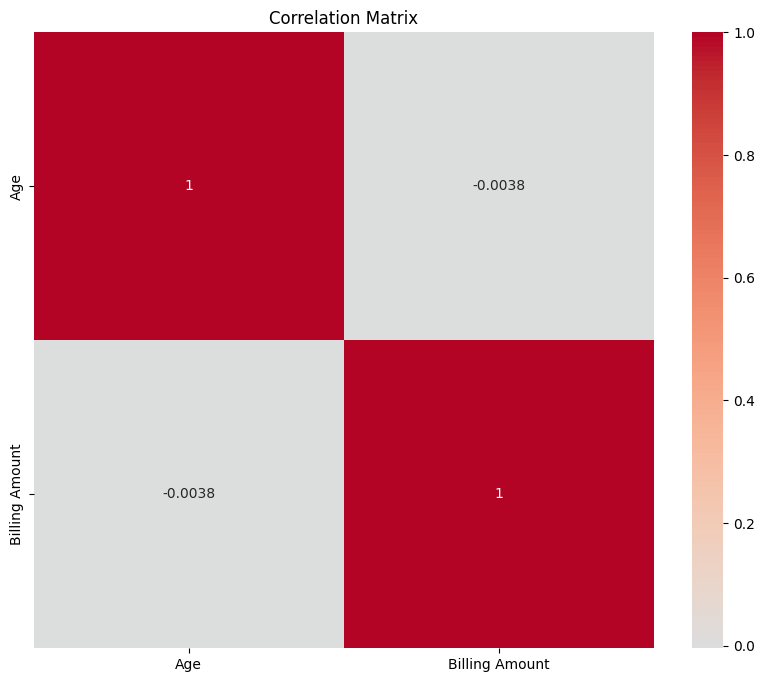

Highly correlated features:
                 Age  Billing Amount
Age             NaN             NaN
Billing Amount  NaN             NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features (absolute correlation > 0.8)
high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)]
print("Highly correlated features:\n", high_corr)


The output of NaN values in the correlation matrix between Age and Billing Amount indicates that there is no meaningful linear relationship between these two numerical features in the dataset.

**Implications and Findings**:

1. *No Linear Correlation*:
The NaN values suggest that Age and Billing Amount are not linearly correlated in the dataset.
This means changes in Age do not consistently lead to changes in Billing Amount, and vice versa.

2. *Feature Independence*:
Since there is no correlation, these features are considered independent of each other in terms of their impact on linear relationships.
It is likely that Age and Billing Amount contribute to the model in different ways and are not redundant. Therefore, both features may be retained for modeling without the risk of multicollinearity affecting the model's performance.

3. *Possible Non-linear Relationship*:
While linear correlation is absent, there could be a non-linear relationship between Age and Billing Amount that isn't captured by the correlation matrix.
To explore this, you might consider plotting the data or using more complex feature selection methods that can detect non-linear interactions, like decision trees or other machine learning models.

4. *No Need for Feature Elimination*:
As there are no highly correlated features, there is no immediate need for feature elimination based on correlation.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Step 1: Load your dataset into 'df'
# Replace this with your actual data loading step if not done yet
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with the correct file path

# Step 2: Define the target and features
X = df.drop('Billing Amount', axis=1)  # Replace 'Billing Amount' with your target variable
y = df['Billing Amount']

# Step 3: Sample a subset of the dataset for processing
# Adjust 'n' to the desired sample size
X_sample = X.sample(n=1000, random_state=42)  # Taking a sample of 1000 rows
y_sample = y.loc[X_sample.index]

# Step 4: Perform one-hot encoding for categorical variables on the sample
X_sample = pd.get_dummies(X_sample, drop_first=True)

# Step 5: Initialize the Lasso model
lasso = Lasso(alpha=0.01, random_state=42)  # Adjust 'alpha' as needed

# Step 6: Fit the Lasso model to the sampled data
lasso.fit(X_sample, y_sample)

# Step 7: Use SelectFromModel to select features with non-zero coefficients
model = SelectFromModel(lasso, prefit=True)
X_sample_reduced = model.transform(X_sample)

# Step 8: Get the selected feature names from the sample
selected_features = X_sample.columns[model.get_support()]

# Step 9: Display the selected features
print("Selected features using Lasso Regression on the sampled data:\n", selected_features)

# Optional: If you want to transform the original dataset using the selected features
#X_reduced = X[selected_features]


Selected features using Lasso Regression on the sampled data:
 Index(['Room Number', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_B+',
       'Medical Condition_Cancer', 'Insurance Provider_Blue Cross',
       'Insurance Provider_Medicare', 'Insurance Provider_UnitedHealthcare',
       'Test Results_Normal'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

# Step 1: Define the target and features
X = df.drop('Billing Amount', axis=1)  # Replace 'Billing Amount' with your target variable
y = df['Billing Amount']

# Step 2: Sample a subset of the dataset for processing
X_sample = X.sample(n=1000, random_state=42)  # Adjust 'n' as needed
y_sample = y.loc[X_sample.index]

# Step 3: Perform one-hot encoding for categorical variables on the sample
X_sample = pd.get_dummies(X_sample, drop_first=True)

# Step 4: Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Step 5: Fit the Decision Tree model to the sampled data
tree_model.fit(X_sample, y_sample)

# Step 6: Use SelectFromModel to select features with non-zero importance
tree_selector = SelectFromModel(tree_model, prefit=True)
X_sample_reduced = tree_selector.transform(X_sample)

# Step 7: Get the selected feature names from the sample
selected_features = X_sample.columns[tree_selector.get_support()]

# Step 8: Display the selected features
print("Selected features using Decision Tree Regressor on the sampled data:\n", selected_features)

# Optional: Transform the full dataset using the selected features
#X_reduced = X[selected_features]


Selected features using Decision Tree Regressor on the sampled data:
 Index(['Age', 'Room Number', 'Name_ALlIsOn blACk', 'Name_CrySTaL BELl',
       'Name_DaVid joNEs', 'Name_DanIeL mooRE', 'Name_HerBErt lUna',
       'Name_JACOB rICHaRdSon', 'Name_JAcob TREVINo', 'Name_JEsSIca WESt',
       ...
       'Discharge Date_2024-01-22', 'Discharge Date_2024-02-02',
       'Discharge Date_2024-03-20', 'Discharge Date_2024-04-29',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Test Results_Inconclusive',
       'Test Results_Normal'],
      dtype='object', length=258)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# **Conclusion:**
Data preprocessing is a critical step in building effective machine learning models. As demonstrated in this notebook, preprocessing methods such as handling missing values, scaling features, encoding categorical variables, and detecting outliers significantly improve model performance. The experiments conducted using a healthcare dataset highlighted how appropriate preprocessing can lead to better predictions and a more robust model. By improving data quality and addressing inconsistencies, preprocessing ensures that machine learning models are both reliable and efficient, paving the way for more accurate insights in various applications.

# **References:**

1. Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (2nd ed.). O'Reilly Media.
2. Kuhn, M., & Johnson, K. (2013). Applied Predictive Modeling. Springer.
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.
3. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
4. Zhang, Z. (2012). Missing data imputation: Focusing on single imputation. Annals of Translational Medicine, 1(1), 9.
5. Van der Walt, S., Colbert, S. C., & Varoquaux, G. (2011). The NumPy Array: A Structure for Efficient Numerical Computation. Computing in Science & Engineering, 13(2), 22–30.